---

### Face Skin Condition Classification Using Deep Learning

- Nama              : Muhammad Aldzahabi Mawarid
- Batch             : HCK-034
---

# Problem Statement and Dataset Description

## Problem Statement
Kesehatan dan estetika kulit wajah merupakan perhatian utama bagi banyak individu, namun identifikasi masalah kulit seringkali bersifat subjektif dan memerlukan konsultasi ahli yang tidak selalu dapat diakses dengan cepat. Kondisi seperti jerawat, bercak hitam (darkspots), kerutan, dan kemerahan dapat muncul akibat berbagai faktor seperti pola hidup, paparan matahari, atau penuaan. Tanpa deteksi dini yang akurat, penanganan yang salah dapat memperburuk kondisi kulit. Saat ini, masyarakat cenderung melakukan diagnosa mandiri yang kurang akurat sebelum membeli produk perawatan. Oleh karena itu, diperlukan sebuah sistem berbasis kecerdasan buatan (Artificial Intelligence) yang mampu mengklasifikasikan kondisi kulit wajah secara otomatis melalui citra digital. Sistem ini diharapkan dapat memberikan deteksi awal yang objektif untuk membantu pengguna memahami kondisi kulit mereka secara lebih spesifik.

## Objective
Proyek ini bertujuan untuk membangun model klasifikasi berbasis Deep Learning yang mampu mengidentifikasi 5 kondisi kulit wajah, yaitu: Darkspot, Jerawatan, Kemerahan, Kerutan, dan Normal. Model dikembangkan untuk memberikan hasil prediksi yang cepat dan akurat berdasarkan input gambar wajah. Dengan adanya sistem ini, diharapkan pengguna dapat melakukan pemantauan kondisi kulit secara mandiri, yang selanjutnya dapat digunakan sebagai referensi awal dalam memilih produk perawatan kulit yang tepat atau memutuskan kapan harus melakukan konsultasi medis profesional.

## Dataset Description
Dataset ini didapatkan dari Kaggle yang kemudian didownload kemudian diolah untuk dilanjutkan processing pembuatan Machine Learning.

# A. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.applications import VGG16, MobileNetV2
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16
from keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mnet2
import tensorflow as tf
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mnet2
from tensorflow.keras.layers import BatchNormalization, Activation

# B. Data Loading

In [ ]:
# folder utama yang berisi subfolder 'Train' dan 'Test'
base_path = 'Skin_Project' 
TRAIN_PATH = os.path.join(base_path, 'Train')
TEST_PATH = os.path.join(base_path, 'Test')
RANDOM_SEED = 42
random.seed(RANDOM_SEED) # Mengunci seed untuk hasil acak yang konsisten

# List ekstensi file gambar yang diizinkan
ALLOWED_EXTENSIONS = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')

def create_dataframe_from_path(data_path):
    data = []
    
    if not os.path.isdir(data_path):
        print(f"Error: Path data tidak ditemukan di: {data_path}")
        return pd.DataFrame() # Kembalikan DataFrame kosong jika error

    # Loop melalui setiap subfolder class
    for label in os.listdir(data_path):
        class_folder = os.path.join(data_path, label)

        if not os.path.isdir(class_folder):
            continue

        # Loop melalui file di dalam folder kelas
        for file_name in os.listdir(class_folder):
            file_path = os.path.join(class_folder, file_name)

            # meewati jika bukan file atau ekstensi tidak diizinkan
            if not file_name.lower().endswith(ALLOWED_EXTENSIONS):
                continue

            # menambahkan data ke list
            data.append({
                'image_path': file_path,
                'label': label
            })

    # Konversi ke DataFrame
    return pd.DataFrame(data)

print("1. Membuat DataFrame untuk Data Pelatihan...")
df_train = create_dataframe_from_path(TRAIN_PATH)

print("2. Membuat DataFrame untuk Data Test...")
df_test = create_dataframe_from_path(TEST_PATH)

print("\n--- DataFrame Pelatihan (df_train) 5 Baris Pertama ---")
print(df_train.head())
print(f"\nTotal Data Pelatihan Ditemukan: {len(df_train)}")

print("\n--- DataFrame Test (df_test) 5 Baris Pertama ---")
print(df_test.head())
print(f"\nTotal Data Test Ditemukan: {len(df_test)}")

1. Membuat DataFrame untuk Data Pelatihan...
2. Membuat DataFrame untuk Data Test...

--- DataFrame Pelatihan (df_train) 5 Baris Pertama ---
                                          image_path     label
0  Skin_Project\Train\Darkspot\0183c6d6-8b71-4a85...  Darkspot
1  Skin_Project\Train\Darkspot\02435230-cde0-4bb8...  Darkspot
2  Skin_Project\Train\Darkspot\06b372d2-f0b4-4bbe...  Darkspot
3  Skin_Project\Train\Darkspot\089c8f6d-60da-46db...  Darkspot
4  Skin_Project\Train\Darkspot\0c4c7bad-0df3-4d0f...  Darkspot

Total Data Pelatihan Ditemukan: 4996

--- DataFrame Test (df_test) 5 Baris Pertama ---
                                          image_path     label
0                   Skin_Project\Test\Darkspot\1.jpg  Darkspot
1                 Skin_Project\Test\Darkspot\100.jpg  Darkspot
2                 Skin_Project\Test\Darkspot\101.jpg  Darkspot
3                 Skin_Project\Test\Darkspot\110.jpg  Darkspot
4  Skin_Project\Test\Darkspot\119432bf-56fd-45ed-...  Darkspot

Total Data Tes

### Data Loading
Main dataset sendiri sebetulnya tidak ada, jadi dataset yang diberikan dari awal sudah dibagi menjadi 2, dimana 1 folder berisikan training sejumlah 4996 gambar, dan juga folder Test sejumlah 694 gambar, kemudian metode untuk memanggil dari dataset tersebut melalui os.path yang pada akhirnya untuk membuat variable baru dari Train dan juga Test.

Kemudian mendefine Random seed = 42 sebagai acuan pengunci data, agar ketia load atau komputer membaca tetap memvisualisasikan gambar yang sama, sehingga memudahkan proses untuk seperti EDA untuk menganalisa dari setiap gambar dari setiap classnya, dan juga untuk mempelajari pola yang telah di train.

informasi selanjutnya adalah dataset ini atau dari setiap folder berisikan 5 class.

Metode untuk memudahkan dalam mendifine setiap folder juga diconvert menjadi dataframe, sehingga ketika ingin memanggil akan mengunakan df untuk memudahkan dalam processing selanjutnya



# C. Data Exploratory

## a. Menampilkan jumlah data per Class

In [3]:
df_train['label'].value_counts()

label
Jerawatan    1000
Kemerahan    1000
Kerutan      1000
Normal       1000
Darkspot      996
Name: count, dtype: int64

Hasil dari df_trainnya adalah memperlihatkan hasil dari folder tersebut yang telah di conver menjadi df, dan bisa dilihat terdapat 5 class yang berbeda yaitu ;
1. Jerawatan sejumlah 1000 gambar
2. Kemerahan sejumlah 1000 gambar
3. Kerutan sejumlah 1000 gambar
4. Normal sejumlah 1000 gambar
5. Darkspot sejumlah 996 gambar

dan dapat dilihat bahwa dari data Train tersebut merupakan data yang balance karena jumlah dari setiap gambarnya sama

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1112\3549006403.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=labels, y=counts, palette="viridis")


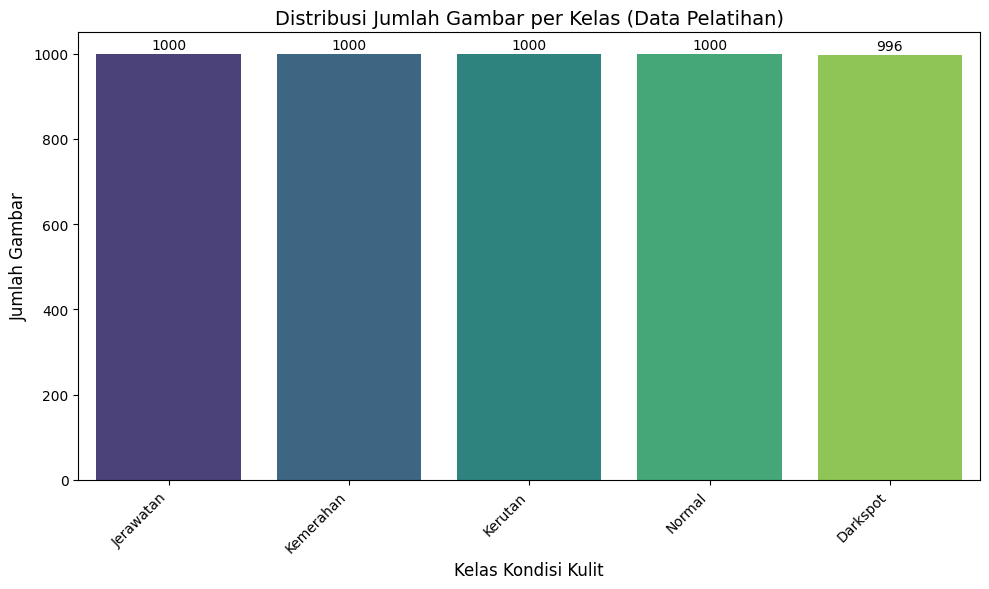

In [ ]:
#  membuat visualisasi
class_counts = df_train['label'].value_counts()
labels = class_counts.index.tolist() 
counts = class_counts.values.tolist() # Jumlah gambar per kelas

plt.figure(figsize=(10, 6))

# Membuat Bar Chart menggunakan Seaborn
bars = sns.barplot(x=labels, y=counts, palette="viridis") 

# menambahkan angka di atas bar (Jumlah Gambar)
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 5, 
             int(bar.get_height()), 
             ha='center', va='bottom',
             fontsize=10)

plt.title("Distribusi Jumlah Gambar per Kelas (Data Pelatihan)", fontsize=14)
plt.xlabel("Kelas Kondisi Kulit", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show() 

Hasil dari visualisasi BarChart disini memperlihatkan distribusi gambar dari setiapclass yang sudah balance 

## b. Visualisasi Contoh Gambar dari setiap Class

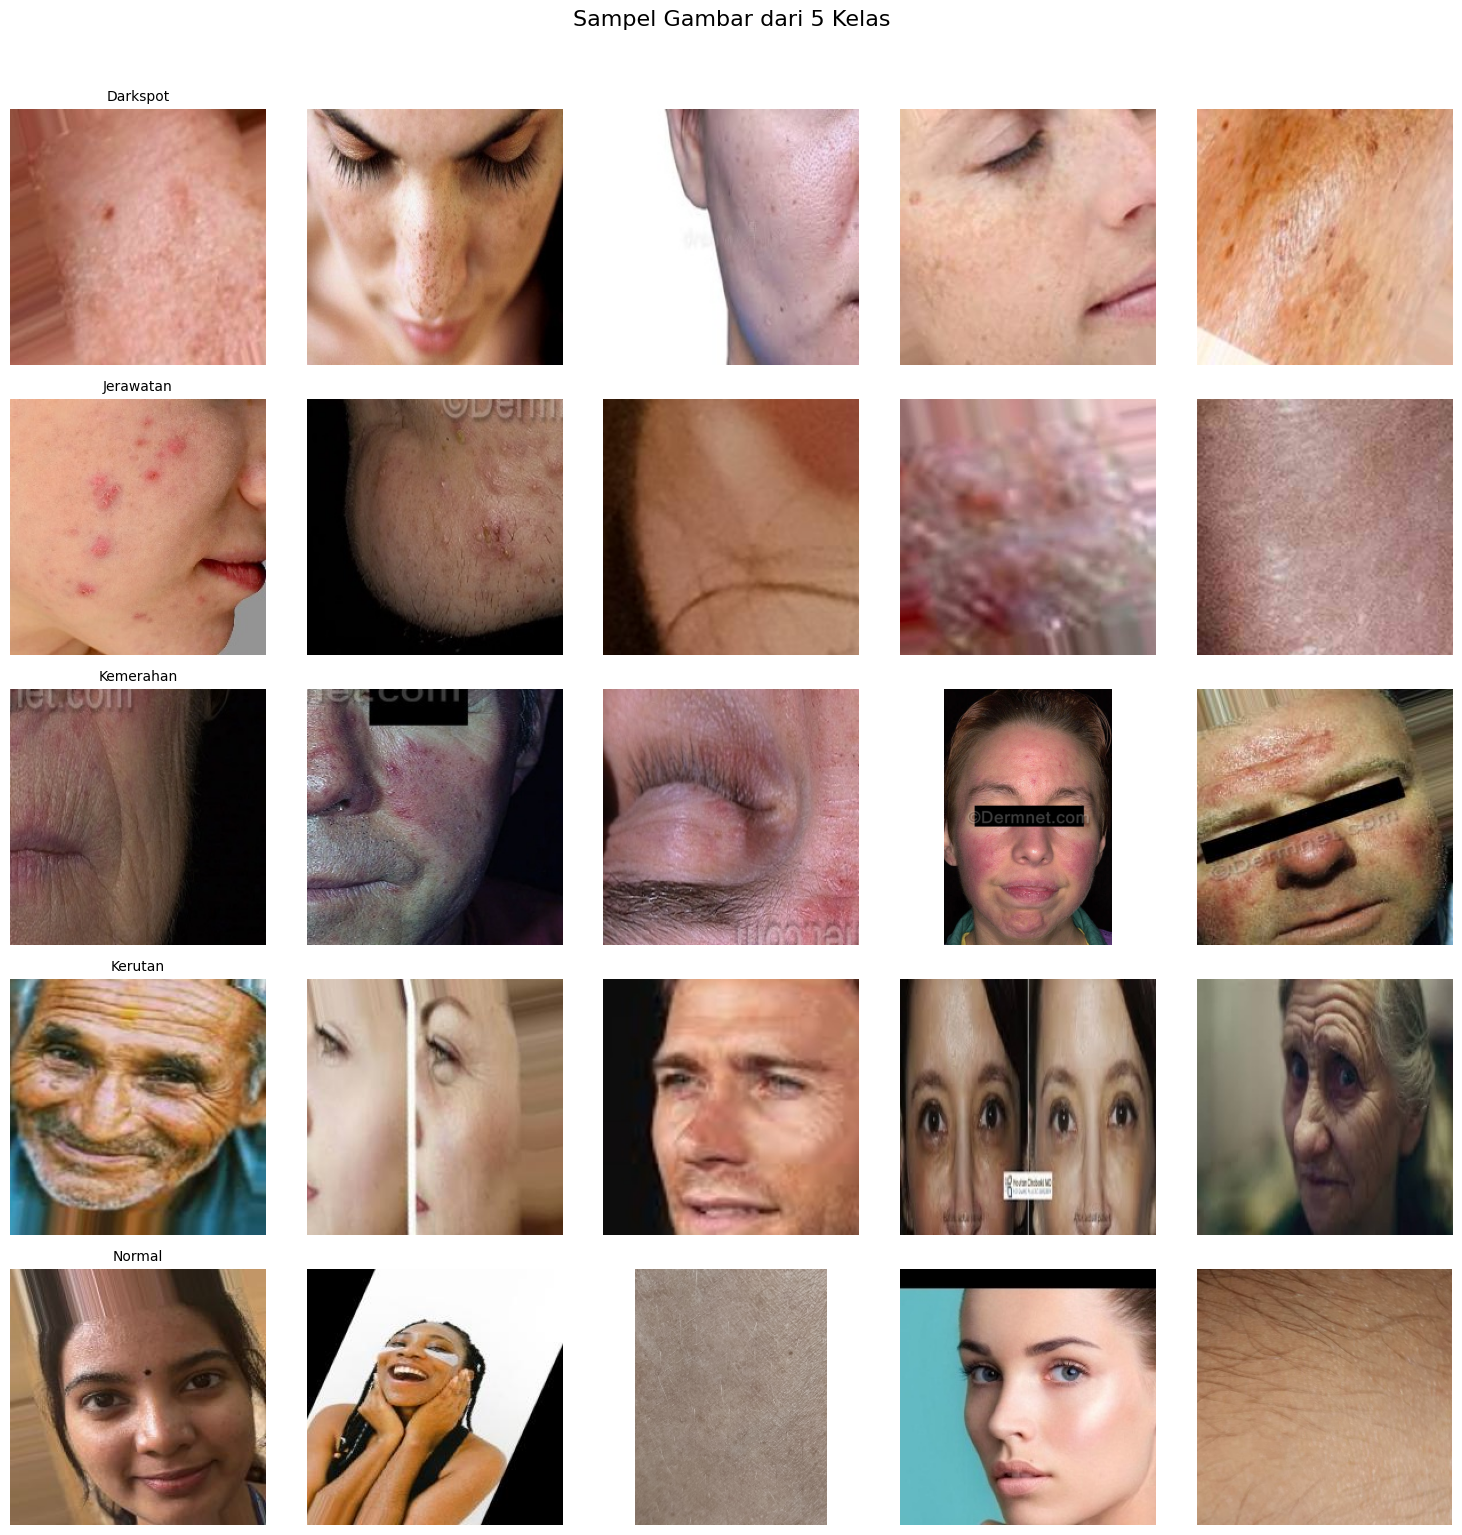

In [5]:
TRAIN_PATH = 'Skin_Project/Train' # Ganti jika path Anda berbeda
num_samples = 5 # Jumlah sampel yang akan ditampilkan per kelas
ALLOWED_EXTENSIONS = ('.png', '.jpg', '.jpeg', '.bmp', '.gif')
# -------------------

# Dapatkan daftar semua folder kelas (labels)
try:
    labels = [lbl for lbl in os.listdir(TRAIN_PATH) 
              if os.path.isdir(os.path.join(TRAIN_PATH, lbl))]
except FileNotFoundError:
    print(f"Error: Folder pelatihan tidak ditemukan di {TRAIN_PATH}")
    labels = []

num_classes = len(labels)

if num_classes > 0:
    # Buat figure dan axes untuk plotting
    fig, axes = plt.subplots(num_classes, num_samples, figsize=(15, 3 * num_classes))
    
    # Menyesuaikan axes jika hanya ada 1 kelas
    if num_classes == 1:
        axes = axes.reshape(1, num_samples)

    for row, lbl in enumerate(labels):
        class_folder = os.path.join(TRAIN_PATH, lbl)
        
        # Ambil semua file gambar
        img_files = [f for f in os.listdir(class_folder) 
                     if f.lower().endswith(ALLOWED_EXTENSIONS)]
        
        # Pilih sampel acak yang terkunci
        sample_imgs = random.sample(img_files, min(num_samples, len(img_files)))

        for col, img_file in enumerate(sample_imgs):
            img_path = os.path.join(class_folder, img_file)
            
            try:
                img = Image.open(img_path)
                ax = axes[row, col]
                ax.imshow(img)
                ax.set_title(lbl if col == 0 else "", fontsize=10)
                ax.axis('off')
            except Exception as e:
                print(f"Gagal memuat {img_file}: {e}")
                
    plt.suptitle(f"Sampel Gambar dari {num_classes} Kelas", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kelas yang ditemukan.")

Memvisualisasikan sample dari setiap class, yang pada umumnya sedikit susah untuk dibedakan, namun akan dijelaskan secara definitif dan akan diberikan recommendation dari setiap kulit wajah yang memiliki latar belakang berbeda di bagian Profiling Class

## c. Dimensi Gambar

In [ ]:
for lbl in labels:
    # Path ke folder spesifik kelas 
    class_path = os.path.join(TRAIN_PATH, lbl)
    
    # Ambil hanya image file yang diizinkan
    img_files = [
        f for f in os.listdir(class_path)
        if f.lower().endswith(ALLOWED_EXTENSIONS)
    ]
    
    # Ambil 1 file pertama untuk dicek
    if img_files:
        sample_file = img_files[0]
        img_path = os.path.join(class_path, sample_file)
        
        try:
            # Buka gambar menggunakan PIL
            img = Image.open(img_path)
            
            # Cetak hasil
            print(f"| {lbl:<15}: {img.size[0]}x{img.size[1]} (Format: {img.format})")
            
        except Exception as e:
            print(f"| {lbl:<15}: GAGAL MEMUAT ({e})")
            
    else:
        print(f"| {lbl:<15}: TIDAK ADA GAMBAR DITEMUKAN")

print("--------------------------------------------------")

| Darkspot       : 224x224 (Format: JPEG)
| Jerawatan      : 224x224 (Format: PNG)
| Kemerahan      : 720x480 (Format: JPEG)
| Kerutan        : 224x224 (Format: JPEG)
| Normal         : 149x121 (Format: JPEG)
--------------------------------------------------


Pada bagian ini bertujuan untuk memverifikasi dimensi seperti lebar dan tinggi dari sebah gambar, serta format file dari sample gambar di setiap kelas dataset. hal ini penting untuk memastikan konsistensi data sebelum masuk ke tahap preprocessing atau pelatihan model. Dapat dilihat data memiliki dimensi yang tidak seragam (misalnya, kelas kemerahan jauh lebih besar dan Normal sangat kecil), oleh karena itu tahap resizing wajib dilakukan agar semua gambar memiliki ukuran input yang sama.

## d. Profiling Class

### 1. Darkspot

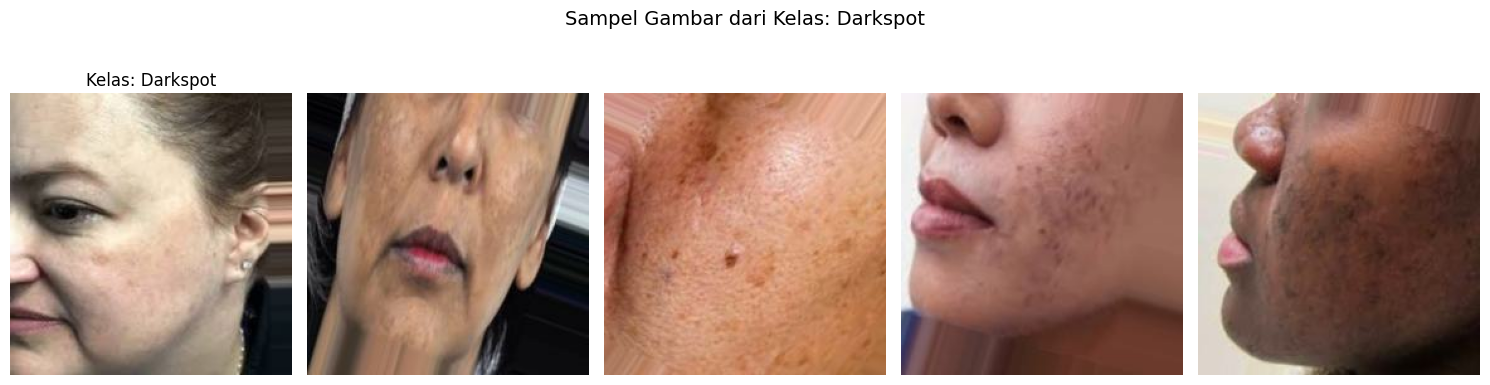

In [7]:
# Label yang ingin difokuskan (hanya satu kelas)
labels = ["Darkspot"] 

num_samples = 5 # Jumlah gambar yang ingin ditampilkan

# Membuat figure dengan 1 baris dan num_samples kolom
fig, axes = plt.subplots(1, num_samples, figsize=(15, 4)) 

# Pastikan axes adalah array 1D karena hanya ada 1 baris
if num_samples == 1:
    axes = [axes] # Membuatnya iterable jika hanya 1 sampel

# Karena hanya ada satu label, kita bisa langsung menggunakan index 0 untuk 'labels'
lbl = labels[0]
row = 0 # Selalu baris pertama

# Path ke folder spesifik kelas (e.g., Skin_Project/Train/Jerawatan)
class_folder = os.path.join(TRAIN_PATH, lbl) 

# 1. Ambil semua image file dari folder kelas
img_files = [
    f for f in os.listdir(class_folder)
    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))
]

# Cek jika tidak ada gambar
if not img_files:
    print(f"Peringatan: Tidak ada gambar di folder {lbl} pada jalur {class_folder}")
else:
    # 2. Pilih 5 gambar acak (atau kurang jika jumlah gambar < 5)
    sample_imgs = random.sample(img_files, min(num_samples, len(img_files)))

    # 3. Tampilkan gambar
    for col, img_file in enumerate(sample_imgs):
        img_path = os.path.join(class_folder, img_file)
        
        try:
            img = Image.open(img_path)

            axes[col].imshow(img)
            # Set judul: Jerawatan hanya di kolom pertama
            axes[col].set_title(f"Kelas: {lbl}" if col == 0 else "") 
            axes[col].axis('off') # Sembunyikan sumbu

        except Exception as e:
            print(f"Gagal memuat atau menampilkan {img_file}: {e}")
            
    plt.suptitle(f"Sampel Gambar dari Kelas: {lbl}", fontsize=14, y=1.02)
    plt.tight_layout() 
    plt.show()

 ### Darkspot 
 Kulit dengan darkspot adalah kondisi kulit wajah yang mengalami penumpukan pigmen melanin secara tidak merata, sehingga dapat dilihat dari sample gambar ditandai dengan muncul bercak atau area yang warnanya lebih gelap dibandingkan warna kulit normal disekitarnya

Karakteristik :
- Warna Coklat, coklat tua, keabu-abuan atau bahkan kehitaman
- Bisa bertahan lama jika tidak cepat ditangani

sehingga Fokus Treatmentnya adalah 
- Mencerahkan
- Menghambat produksi melanin
- dan juga Melindungi muka dari sinar UV

Rekomendasi untuk Skincare yang bisa digunakan adalah
- yang mengandung Niacinamide untuk mencerahkan
- Vitamin C untuk fade dark spotnya
- dan Retinol (low dose) untuk regenerasi kulit pada malam hari

### 2. Jerawatan

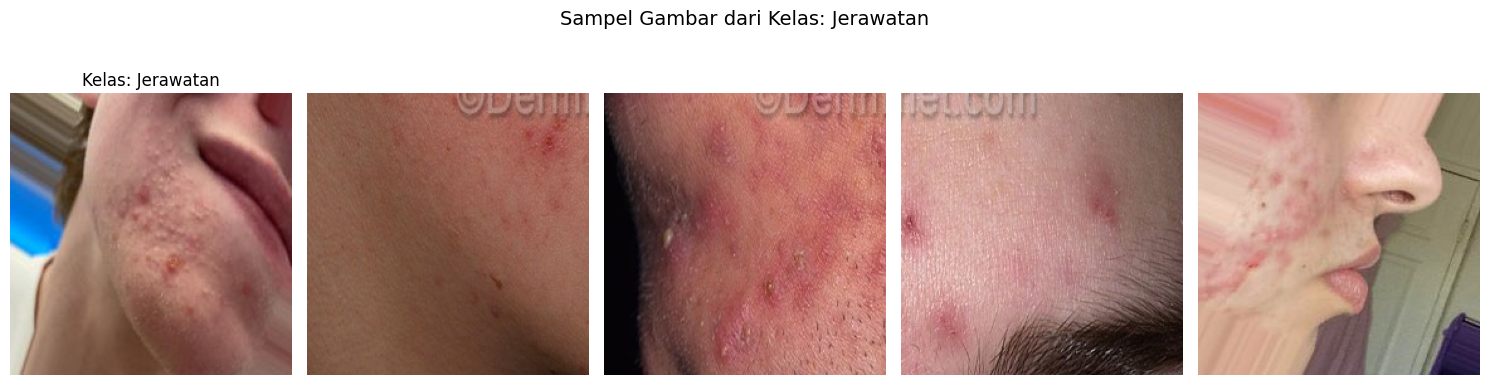

In [8]:
# Label yang ingin difokuskan (hanya satu kelas)
labels = ["Jerawatan"] 

num_samples = 5 # Jumlah gambar yang ingin ditampilkan

# Membuat figure dengan 1 baris dan num_samples kolom
fig, axes = plt.subplots(1, num_samples, figsize=(15, 4)) 

# Pastikan axes adalah array 1D karena hanya ada 1 baris
if num_samples == 1:
    axes = [axes] # Membuatnya iterable jika hanya 1 sampel

# Karena hanya ada satu label, kita bisa langsung menggunakan index 0 untuk 'labels'
lbl = labels[0]
row = 0 # Selalu baris pertama

# Path ke folder spesifik kelas (e.g., Skin_Project/Train/Jerawatan)
class_folder = os.path.join(TRAIN_PATH, lbl) 

# 1. Ambil semua image file dari folder kelas
img_files = [
    f for f in os.listdir(class_folder)
    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))
]

# Cek jika tidak ada gambar
if not img_files:
    print(f"Peringatan: Tidak ada gambar di folder {lbl} pada jalur {class_folder}")
else:
    # 2. Pilih 5 gambar acak (atau kurang jika jumlah gambar < 5)
    sample_imgs = random.sample(img_files, min(num_samples, len(img_files)))

    # 3. Tampilkan gambar
    for col, img_file in enumerate(sample_imgs):
        img_path = os.path.join(class_folder, img_file)
        
        try:
            img = Image.open(img_path)

            axes[col].imshow(img)
            # Set judul: Jerawatan hanya di kolom pertama
            axes[col].set_title(f"Kelas: {lbl}" if col == 0 else "") 
            axes[col].axis('off') # Sembunyikan sumbu

        except Exception as e:
            print(f"Gagal memuat atau menampilkan {img_file}: {e}")
            
    plt.suptitle(f"Sampel Gambar dari Kelas: {lbl}", fontsize=14, y=1.02)
    plt.tight_layout() 
    plt.show()

### Jerawatan

Kulit muka jerawatan adalah kondisi kulit yang memiliki kecenderunan tinggi untuk membentuk jerawat akibat ketidakseimbangan antara produksi minyak, pergantian sel kulit, dan aktivitas bakteri di pori-pori

Karakteristik :
- mudah muncul komedo dan jerawat aktif yang disebabkan sebum yang tinggi 
- kulit sering tampak berminyak
- pori-pori terlihat lebih besar
- dan juga dapat meninggalkan bekas setelah jerawat sembuh

Sehingga fokus treatmentnya adalah 
- Kontrol minyak
- buka pori
- redam inflamasi

Rekomendasi skincare yang cocok untuk kulit muka berjerawat adalah yang mengandung
- Salicylic Acid (BHA) untuk membersihkan pori
- Daun Teh/Centella untuk membuat kulit relax
- Azelaic Acid


### 3. Kemerahan

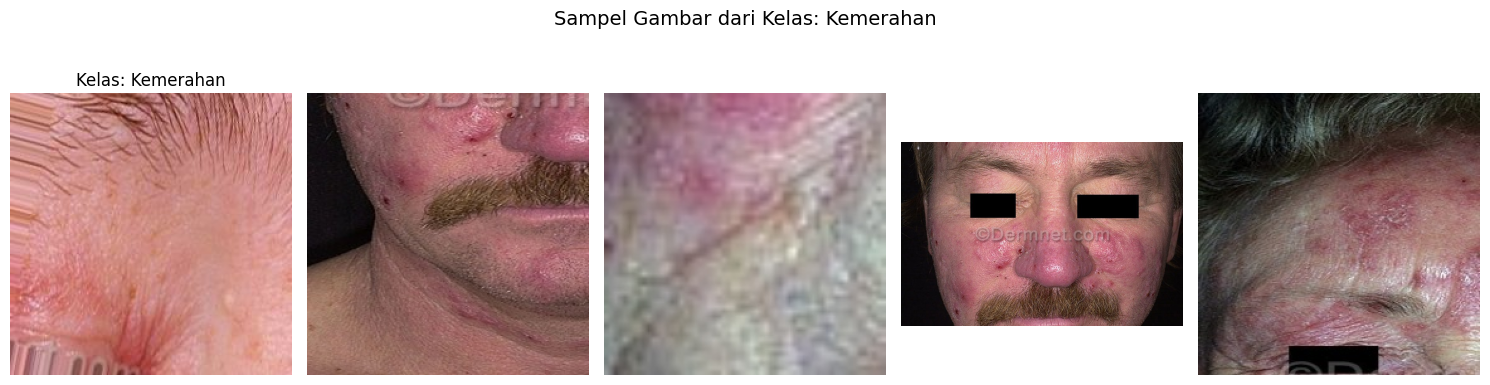

In [9]:
# Label yang ingin difokuskan (hanya satu kelas)
labels = ["Kemerahan"] 

num_samples = 5 # Jumlah gambar yang ingin ditampilkan

# Membuat figure dengan 1 baris dan num_samples kolom
fig, axes = plt.subplots(1, num_samples, figsize=(15, 4)) 

# Pastikan axes adalah array 1D karena hanya ada 1 baris
if num_samples == 1:
    axes = [axes] # Membuatnya iterable jika hanya 1 sampel

# Karena hanya ada satu label, kita bisa langsung menggunakan index 0 untuk 'labels'
lbl = labels[0]
row = 0 # Selalu baris pertama

# Path ke folder spesifik kelas (e.g., Skin_Project/Train/Jerawatan)
class_folder = os.path.join(TRAIN_PATH, lbl) 

# 1. Ambil semua image file dari folder kelas
img_files = [
    f for f in os.listdir(class_folder)
    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))
]

# Cek jika tidak ada gambar
if not img_files:
    print(f"Peringatan: Tidak ada gambar di folder {lbl} pada jalur {class_folder}")
else:
    # 2. Pilih 5 gambar acak (atau kurang jika jumlah gambar < 5)
    sample_imgs = random.sample(img_files, min(num_samples, len(img_files)))

    # 3. Tampilkan gambar
    for col, img_file in enumerate(sample_imgs):
        img_path = os.path.join(class_folder, img_file)
        
        try:
            img = Image.open(img_path)

            axes[col].imshow(img)
            # Set judul: Jerawatan hanya di kolom pertama
            axes[col].set_title(f"Kelas: {lbl}" if col == 0 else "") 
            axes[col].axis('off') # Sembunyikan sumbu

        except Exception as e:
            print(f"Gagal memuat atau menampilkan {img_file}: {e}")
            
    plt.suptitle(f"Sampel Gambar dari Kelas: {lbl}", fontsize=14, y=1.02)
    plt.tight_layout() 
    plt.show()

### Kemerahan

Kulit kemerahan atau bisa dibilang inflamed skin, menunjukan reaksi inflamasi atau sensitivitas berlebih, ditandai dengan warna kemerahan yang muncul secara sementara atau menetap

Karakteristik :
- Warna kemerahan di pipi, hidung, dagu
- kulit terasa panas, perih, atau tertarik
- mudah bereaksi terhadap produk baru

Sehingga fokus Treatmentnya adalah
- Menenangkan kulit wajah
- perbaiki skin barrier
- minimalist skincare

Rekomendasi untuk Skincare yang bisa digunakan yang mengandung
- Centella asiatica
- panthenol
- caramide

### 4. Kerutan

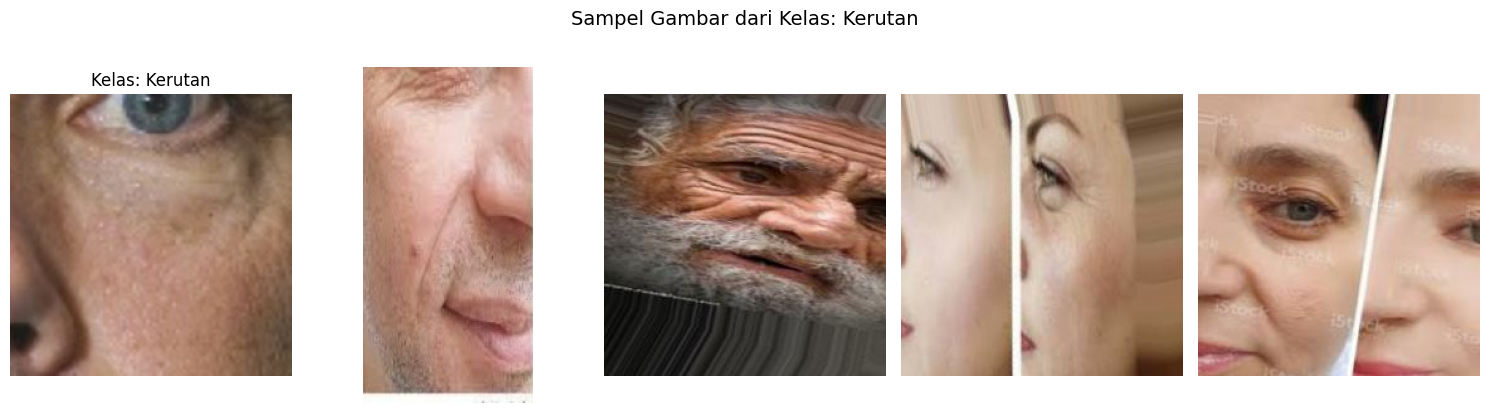

In [10]:
# Label yang ingin difokuskan (hanya satu kelas)
labels = ["Kerutan"] 

num_samples = 5 # Jumlah gambar yang ingin ditampilkan

# Membuat figure dengan 1 baris dan num_samples kolom
fig, axes = plt.subplots(1, num_samples, figsize=(15, 4)) 

# Pastikan axes adalah array 1D karena hanya ada 1 baris
if num_samples == 1:
    axes = [axes] # Membuatnya iterable jika hanya 1 sampel

# Karena hanya ada satu label, kita bisa langsung menggunakan index 0 untuk 'labels'
lbl = labels[0]
row = 0 # Selalu baris pertama

# Path ke folder spesifik kelas (e.g., Skin_Project/Train/Jerawatan)
class_folder = os.path.join(TRAIN_PATH, lbl) 

# 1. Ambil semua image file dari folder kelas
img_files = [
    f for f in os.listdir(class_folder)
    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))
]

# Cek jika tidak ada gambar
if not img_files:
    print(f"Peringatan: Tidak ada gambar di folder {lbl} pada jalur {class_folder}")
else:
    # 2. Pilih 5 gambar acak (atau kurang jika jumlah gambar < 5)
    sample_imgs = random.sample(img_files, min(num_samples, len(img_files)))

    # 3. Tampilkan gambar
    for col, img_file in enumerate(sample_imgs):
        img_path = os.path.join(class_folder, img_file)
        
        try:
            img = Image.open(img_path)

            axes[col].imshow(img)
            # Set judul: Jerawatan hanya di kolom pertama
            axes[col].set_title(f"Kelas: {lbl}" if col == 0 else "") 
            axes[col].axis('off') # Sembunyikan sumbu

        except Exception as e:
            print(f"Gagal memuat atau menampilkan {img_file}: {e}")
            
    plt.suptitle(f"Sampel Gambar dari Kelas: {lbl}", fontsize=14, y=1.02)
    plt.tight_layout() 
    plt.show()

### Kerutan

Kulit berkerut adalah kondisi kulit wajah yang mengalami penurunan elastisitas, kepadatan, dan kelembapan, sebagai bagian dari proses penuaan alami. Seiring bertambahnya usia maka prdoduksi kolagen dan elastin dalam kulit menurun. Akibatnya, kulit tidak sekenyal dan sekencang sebelumnya, sehingga muncul garis halus dan kerutana

Karakteristik :
- Garis halus
- Kulit terasa lebih kering atau tipis
- Elastis berkurang

Sehingga fokus Treatmentnya adalah
- Stimulasi Kolagen
- Hidrasi intens
- Proteksi UV

Rekomendasi untuk Skincare yang bisa digunakan yang mengandung
- Retinol/Retina, tapi ini tidak disarankan untuk orang yang lanjut usia, karena biasanya orang yang lebih tua memiliki sensitivitas kulit yang lebih
- Hyularonic
- Ceramide

### 5. Normal

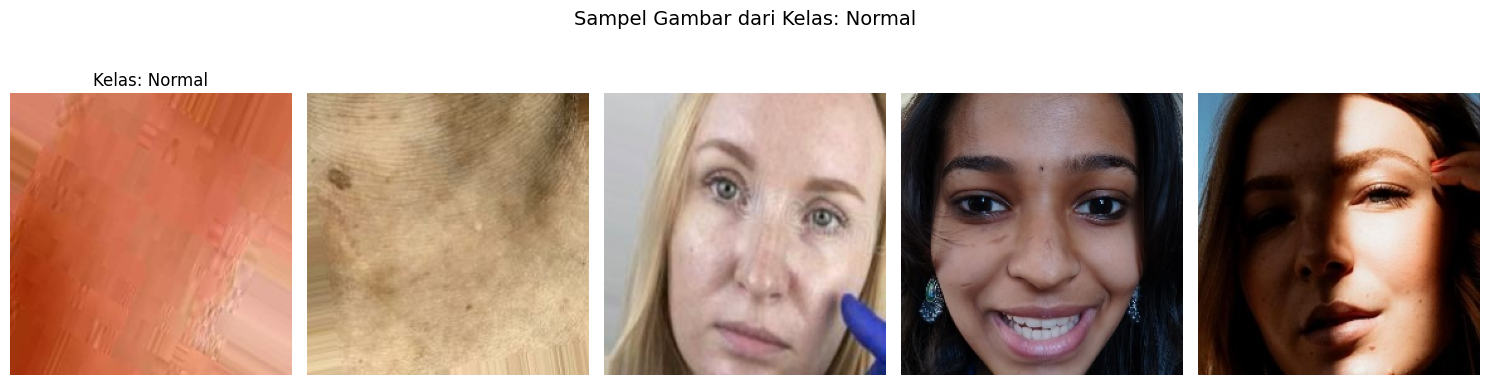

In [11]:
# Label yang ingin difokuskan (hanya satu kelas)
labels = ["Normal"] 

num_samples = 5 # Jumlah gambar yang ingin ditampilkan

# Membuat figure dengan 1 baris dan num_samples kolom
fig, axes = plt.subplots(1, num_samples, figsize=(15, 4)) 

# Pastikan axes adalah array 1D karena hanya ada 1 baris
if num_samples == 1:
    axes = [axes] # Membuatnya iterable jika hanya 1 sampel

# Karena hanya ada satu label, kita bisa langsung menggunakan index 0 untuk 'labels'
lbl = labels[0]
row = 0 # Selalu baris pertama

# Path ke folder spesifik kelas (e.g., Skin_Project/Train/Jerawatan)
class_folder = os.path.join(TRAIN_PATH, lbl) 

# 1. Ambil semua image file dari folder kelas
img_files = [
    f for f in os.listdir(class_folder)
    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))
]

# Cek jika tidak ada gambar
if not img_files:
    print(f"Peringatan: Tidak ada gambar di folder {lbl} pada jalur {class_folder}")
else:
    # 2. Pilih 5 gambar acak (atau kurang jika jumlah gambar < 5)
    sample_imgs = random.sample(img_files, min(num_samples, len(img_files)))

    # 3. Tampilkan gambar
    for col, img_file in enumerate(sample_imgs):
        img_path = os.path.join(class_folder, img_file)
        
        try:
            img = Image.open(img_path)

            axes[col].imshow(img)
            # Set judul: Jerawatan hanya di kolom pertama
            axes[col].set_title(f"Kelas: {lbl}" if col == 0 else "") 
            axes[col].axis('off') # Sembunyikan sumbu

        except Exception as e:
            print(f"Gagal memuat atau menampilkan {img_file}: {e}")
            
    plt.suptitle(f"Sampel Gambar dari Kelas: {lbl}", fontsize=14, y=1.02)
    plt.tight_layout() 
    plt.show()

### Normal

Kulit normal adalah kondisi kulit wajah yang berada dalam keadaan seimbang, baik dari segi produksi minyak, kelembapan, dan juga sensitivitas. Kulit normal tidak berarti "Sempurna", tetapi menunjukkaan fungsi kulit yang berjalan optimal tanpa gangguan berarti.

Karakteristik :
- Tekstur halus dan merata 
- Tidak terlalu berminyak atau kering
- Jarang mengalami iritasi atau jerawat

Sehingga fokus Treatmentnya adalah
- Maintenance kulit pada umumnya, seperti menggunakan air bersih dan juga pelembab pada umumnya
- Proteksi, seperti menggunakan sunscreen untuk menangkal sinar UV, dan juga anti aging

Rekomendasi untuk Skincare yang bisa digunakan yang mengandung
- Niacinamide ringan
- Hyaluronoic Acid
- Antioxidant

# D. Feature Engineering

Pada Feature Engineering pada umumnya melakukan splitting data seperti data Train, Test dan juga Validation, 

# E. Base Model 

## Augmentasi

In [ ]:
# Augmentation train, val, test
train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip=True,    
    vertical_flip=False,      
    rotation_range=10,       
    fill_mode='nearest',     
    validation_split=0.2
)

# Training Set
train_set_aug = train_datagen_aug.flow_from_dataframe(
    df_train,
    directory=None,
    target_size=(224,224),
    x_col='image_path',
    y_col='label',
    class_mode='sparse',
    subset='training',
    batch_size=32,
    shuffle=True,           
    seed=42
)

# Validation Set
val_set_aug = train_datagen_aug.flow_from_dataframe(
    df_train,
    directory=None,
    target_size=(224,224),
    x_col='image_path',
    y_col='label',
    class_mode='sparse',
    subset='validation',
    batch_size=32,
    shuffle=False,           
    seed=42
)

test_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set_aug = test_datagen_aug.flow_from_dataframe(df_test,
                                                    target_size=(224,224),  
                                                    directory=None,
                                                    class_mode='sparse',
                                                    x_col='image_path',
                                                    y_col='label',
                                                    batch_size=32,
                                                    shuffle=False,
                                                    seed=42)

Found 3997 validated image filenames belonging to 5 classes.
Found 999 validated image filenames belonging to 5 classes.
Found 694 validated image filenames belonging to 5 classes.


Pada tahap ini, dilakukan persiapan data citra agar model memiliki performa yang bagus dan general. Proses preprocessing dilakukan dengan detail sebagai berikut:

Peningkatan Variasi Data (Augmentasi): Data disiapkan untuk menghadapi segala kondisi nyata dengan simulasi transformasi seperti rotasi (rotation_range), pergeseran, dan pembalikan gambar (horizontal_flip). Hal ini bertujuan agar model dapat menemukan pola unik pada setiap kelas (seperti bentuk jerawat atau garis kerutan) dan tidak hanya sekadar menghafal posisi piksel tertentu.

Pembagian Data Validation: Data validasi diambil langsung dari data train dengan proporsi 30%. Berdasarkan distribusi data Anda, pembagian ini menghasilkan alokasi yang seimbang untuk memantau performa model selama proses pelatihan, guna memastikan model mampu mengenali data baru yang belum pernah dilihat sebelumnya.

Standardisasi Ukuran (Re-sizing): Karena data asli memiliki resolusi yang sangat beragam (misalnya kelas Kemerahan yang mencapai 720x480 vs Normal 149x121), dilakukan re-sizing pada semua citra menjadi target size 224 x 224. Ukuran ini dipilih untuk menyesuaikan dengan syarat input arsitektur MobileNetV2.

Normalisasi Nilai Piksel (Re-scalling): Dilakukan proses re-scalling dengan membagi nilai piksel dengan 255 sehingga didapat output dalam rentang 0-1. Hal ini bertujuan untuk memperkecil skala komputasi agar beban model tidak terlalu berat, mempercepat konvergensi gradient descent, serta membantu menghindari risiko overfitting.

# Model Definition

In [13]:
# Clear session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

clear session dilakukan pada setiap akan dilakukan re-modeling, jika ini tidak dilakukan maka saat model dilatih dengan pola yang berbeda model akan melanjutkan pembelajaran sebelumnya sementara yang diinginkan adalah pola belajar dari awal

In [14]:
# Buat model Sequential baru
model_aug = Sequential()

# Block 1
model_aug.add(Conv2D(32, (3,3), padding='same',
                     kernel_initializer='he_normal',
                     input_shape=(224,224,3)))
model_aug.add(BatchNormalization())
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(2,2))

# Block 2
model_aug.add(Conv2D(64, (3,3), padding='same',
                     kernel_initializer='he_normal'))
model_aug.add(BatchNormalization())
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(2,2))

# Block 3
model_aug.add(Conv2D(128, (3,3), padding='same',
                     kernel_initializer='he_normal'))
model_aug.add(BatchNormalization())
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(2,2))

# Block 4
model_aug.add(Conv2D(256, (3,3), padding='same',
                     kernel_initializer='he_normal'))
model_aug.add(BatchNormalization())
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(2,2))

# Head (Classification Layers)
model_aug.add(GlobalAveragePooling2D())
model_aug.add(Dense(128, activation='relu'))
model_aug.add(Dropout(0.5))
model_aug.add(Dense(5, activation='softmax')) # Output 5 kelas

# Model Compile
model_aug.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pada tahap ini, dibuat sebuah model CNN (Convolutional Neural Network) menggunakan Sequential API. Arsitektur ini dirancang untuk mengekstraksi fitur dari gambar kondisi kulit wajah secara bertahap melalui beberapa blok konvolusi.
Detail Arsitektur Model:
1. Blok Konvolusi (Feature Extraction):
-Terdiri dari 4 blok utama dengan jumlah filter yang meningkat secara progresif (32, 64, 128, 256). Hal ini bertujuan agar model dapat menangkap fitur sederhana (seperti tepi/garis) hingga fitur yang lebih kompleks (seperti tekstur jerawat atau pola kerutan).
-Batch Normalization: Digunakan di setiap blok untuk menstabilkan proses pembelajaran dan mempercepat konvergensi dengan menormalisasi aktivasi pada setiap layer.
-Activation (ReLU): Memberikan sifat non-linearitas agar model dapat mempelajari pola yang rumit.
-MaxPooling2D: Melakukan reduksi dimensi (downsampling) sehingga model lebih efisien dan fokus pada fitur yang paling dominan.

2. Global Average Pooling 2D (GAP):
-Berfungsi untuk mengubah feature map 3D menjadi vektor 1D dengan mengambil nilai rata-rata setiap channel. GAP dipilih karena lebih efisien daripada layer Flatten tradisional dan membantu mengurangi risiko overfitting.

3. Fully Connected Layer (Classification Head):
-Dense Layer (128 neuron): Berfungsi untuk mengolah fitur yang telah diekstraksi untuk proses klasifikasi.
-Dropout (0.5): Mematikan 50% neuron secara acak selama pelatihan untuk mencegah model terlalu bergantung pada neuron tertentu (prevent overfitting).
-Output Layer (5 neuron): Menggunakan fungsi aktivasi Softmax untuk menghasilkan probabilitas prediksi bagi 5 kelas kondisi kulit (Darkspot, Jerawatan, Kemerahan, Kerutan, Normal).
-Model Compilation:Optimizer (Adam): Digunakan dengan learning rate kecil ($1 \times 10^{-4}$) agar proses update weight berlangsung lebih halus dan stabil.Loss Function: Menggunakan sparse_categorical_crossentropy karena label target berupa angka integer (0-4).

# Model Training

In [15]:
# # gunakan earlystopping untuk val_loss loss paling kecil
# callback = EarlyStopping(monitor = 'val_loss',
#                          patience = 5,
#                          restore_best_weights = True)

Saya tidak menggunakan ini atau saya tutup menggunakan dokstring, karena sebelumnya sudah dilakukan dan hasilnya sama saat berhenti disuatu epoch, sehingg saya tidak menggunakannya dan menunggu epoch 20 selesai

In [16]:
history_seq = model_aug.fit(train_set_aug, 
                            epochs=20, 
                            validation_data=val_set_aug, 
                            batch_size=32)


c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 438s 3s/step - accuracy: 0.4240 - loss: 1.3683 - val_accuracy: 0.0010 - val_loss: 2.7457
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 380s 3s/step - accuracy: 0.5630 - loss: 1.0109 - val_accuracy: 0.0020 - val_loss: 3.6592
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 417s 3s/step - accuracy: 0.6261 - loss: 0.9072 - val_accuracy: 0.0020 - val_loss: 4.1742
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 413s 3s/step - accuracy: 0.6495 - loss: 0.8540 - val_accuracy: 0.0010 - val_loss: 4.4332
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 342s 3s/step - accuracy: 0.6720 - loss: 0.8090 - val_accuracy: 0.0010 - val_loss: 4.5817
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.6774 - loss: 0.7992 - val_accuracy: 0.0010 - val_loss: 5.2531
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - accuracy: 0.6943 - loss: 0.7558 - val_accuracy: 0.0020 - val_loss: 5.0469
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.7126 - loss: 0.7265 - val_accu

# Model Evaluation

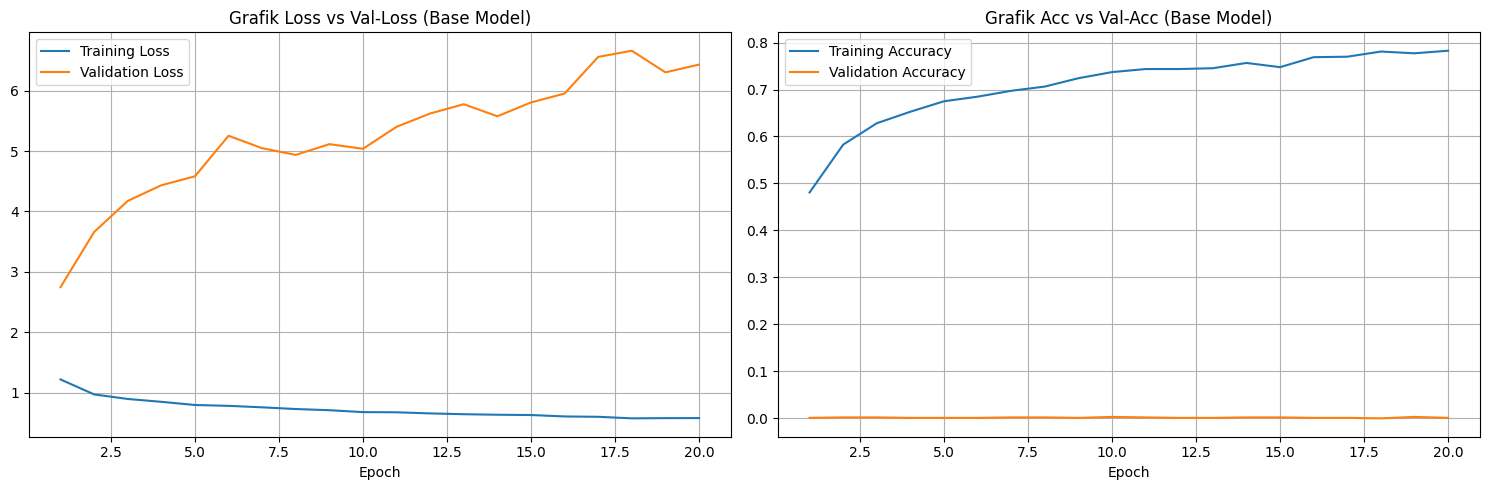

In [17]:
# Plot training result

history_sequential_df = pd.DataFrame(history_seq.history)

# Buat array epoch: 1 sampai jumlah epoch
epochs = np.arange(1, len(history_sequential_df) + 1)

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_sequential_df['loss'], label='Training Loss')
plt.plot(epochs, history_sequential_df['val_loss'], label='Validation Loss')
plt.grid(True)
plt.legend()
plt.title('Grafik Loss vs Val-Loss (Base Model)')
plt.xlabel('Epoch')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_sequential_df['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_sequential_df['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.legend()
plt.title('Grafik Acc vs Val-Acc (Base Model)')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

In [18]:
# predict data test
y_pred_prob = model_aug.predict(test_set_aug)

# pilih class dengan predict probabilitas tertinggi 
y_pred_class = np.argmax(y_pred_prob, axis=-1)

# tampilkan hasil dengan predict prob tertinggi
print(classification_report(test_set_aug.classes, y_pred_class, target_names=np.array(list(train_set_aug.class_indices.keys()))))

c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 636ms/step
              precision    recall  f1-score   support

    Darkspot       0.00      0.00      0.00        61
   Jerawatan       0.63      0.55      0.59       185
   Kemerahan       0.42      0.88      0.57       108
     Kerutan       0.48      0.88      0.62       100
      Normal       0.88      0.45      0.60       240

    accuracy                           0.57       694
   macro avg       0.48      0.55      0.47       694
weighted avg       0.61      0.57      0.54       694



c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Berdasarkan grafik Loss dan Accuracy yang dihasilkan selama proses pelatihan arsitektur CNN buatan (Base Model)

1. Analisis Grafik Loss (Kehilangan)
Penurunan Konsisten: Grafik Training Loss (garis biru) menunjukkan penurunan yang konsisten, yang berarti model berhasil mempelajari bobot untuk meminimalkan kesalahan prediksi pada data latih.

Kesenjangan (Gap) pada Validation: Terlihat adanya jarak antara Training Loss dan Validation Loss. Meskipun Validation Loss menurun, namun nilainya tetap berada di atas Training Loss. Hal ini mengindikasikan model mulai mengalami Overfitting, di mana model terlalu fokus menghafal data training dan sedikit kesulitan saat menghadapi data baru (validation).

2. Analisis Grafik Accuracy (Akurasi)
Peningkatan Bertahap: Akurasi meningkat secara perlahan dari epoch ke epoch. Ini menunjukkan bahwa kombinasi lapisan Conv2D dan MaxPooling2D yang Anda susun sudah bekerja dalam mengekstraksi fitur dasar dari gambar kulit.

Titik Jenuh (Plateau): Grafik akurasi cenderung mulai mendatar (stuck) di nilai tertentu sebelum mencapai angka maksimal. Hal ini menandakan bahwa arsitektur CNN sederhana ini memiliki batasan dalam mengenali fitur tekstur kulit yang sangat kompleks (seperti perbedaan antara Darkspot yang samar dengan kulit Normal).

3. Catatan Evaluasi Teknis
Efek Dropout & Batch Normalization: Penggunaan Dropout(0.5) dan BatchNormalization pada kode Anda terlihat sangat membantu menjaga agar grafik tidak berfluktuasi terlalu tajam (liar), sehingga proses training berjalan cukup stabil.

Kebutuhan Ekstraksi Fitur: Meskipun model sudah mampu mengenali pola, arsitektur ini masih membutuhkan lebih banyak lapisan atau pengolahan data yang lebih mendalam untuk bisa membedakan kelas-kelas yang memiliki kemiripan visual tinggi secara lebih akurat.

sehingga ini dapat dikatakan model yang sangat overfitting extreme

# F. Model Improvement

## Augmentation

In [19]:
pretrained_model_mnet2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pretrained_model_mnet2.trainable = False

In [ ]:
# Augmentation Mnet2
train_datagen_aug_mnet2 = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,    
    vertical_flip=False,      
    rotation_range=10,       
    fill_mode='nearest',     
    validation_split=0.2,
    preprocessing_function=preprocess_input_mnet2
)

# Training Set
train_set_aug_mnet2 = train_datagen_aug_mnet2.flow_from_dataframe(
    df_train,
    directory=None,
    target_size=(224,224),
    x_col='image_path',
    y_col='label',
    class_mode='sparse',
    subset='training',
    batch_size=32,
    shuffle=True,          
    seed=42
)

# Validation Set
val_set_aug_mnet2 = train_datagen_aug_mnet2.flow_from_dataframe(
    df_train,
    directory=None,
    target_size=(224,224),
    x_col='image_path',
    y_col='label',
    class_mode='sparse',
    subset='validation',
    batch_size=32,
    shuffle=False,           
    seed=42
)

test_datagen_aug_mnet2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input_mnet2)

test_set_aug_mnet2 = test_datagen_aug_mnet2.flow_from_dataframe(df_test,
                                                    target_size=(224,224),  
                                                    directory=None,
                                                    class_mode='sparse',
                                                    x_col='image_path',
                                                    y_col='label',
                                                    batch_size=32,
                                                    shuffle=False,
                                                    seed=42)

Found 3997 validated image filenames belonging to 5 classes.
Found 999 validated image filenames belonging to 5 classes.
Found 694 validated image filenames belonging to 5 classes.


Pada tahap pengembangan model menggunakan pendekatan Transfer Learning, proses persiapan data dilakukan dengan konfigurasi augmentasi yang lebih dioptimalkan agar sesuai dengan karakteristik citra wajah. Pengaturan ImageDataGenerator dirancang secara spesifik dengan mengaktifkan fitur horizontal flip untuk menggandakan variasi data secara simetris, namun menonaktifkan vertical flip mengingat posisi wajah manusia dalam pengambilan gambar medis umumnya selalu tegak. Selain itu, rentang rotasi dibatasi hanya sebesar 10 derajat guna mencegah perubahan posisi yang terlalu ekstrem yang dapat mengaburkan fitur tekstur kulit. Hal yang paling krusial pada tahap ini adalah integrasi preprocessing_function bawaan MobileNetV2, yang secara otomatis menormalkan nilai piksel ke rentang -1 hingga 1 agar identik dengan distribusi data saat model tersebut dilatih pada dataset ImageNet.

Data kemudian dimuat melalui fungsi flow_from_dataframe dengan pembagian subset yang ketat untuk menjamin validitas pengujian. Set pelatihan dikonfigurasi dengan fitur shuffle aktif agar urutan gambar yang dipelajari model selalu acak pada setiap epoch, sehingga model terdorong untuk mengekstraksi pola fitur kulit wajah secara umum dan menghindari risiko penghafalan urutan data. Sebaliknya, pada set validasi dan set pengujian, fitur pengacakan dinonaktifkan guna menjaga konsistensi evaluasi performa model. Melalui standarisasi ukuran ke 224x224 piksel dan penggunaan generator yang efisien secara memori, dataset kini siap digunakan untuk melatih arsitektur tingkat lanjut dengan basis pengetahuan yang sudah ada sebelumnya.

# Model Definition

In [21]:
# Clear session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [22]:
# Create Sequential API model - Versi Ringan
model_aug_mnet2 = Sequential()
model_aug_mnet2.add(pretrained_model_mnet2) 
model_aug_mnet2.add(GlobalAveragePooling2D()) 

# Mengecilkan neuron dari 256 ke 64 atau 128 agar lebih enteng
model_aug_mnet2.add(Dense(64, activation='relu', 
                          kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_aug_mnet2.add(Dropout(0.3)) # Dropout juga bisa sedikit dikurangi jika neuron lebih sedikit
model_aug_mnet2.add(Dense(5, activation='softmax', 
                          kernel_initializer=tf.keras.initializers.glorot_normal(seed)))

# Model Aug Compile
model_aug_mnet2.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
             metrics=['accuracy'])

# Tampilkan ringkasan model
model_aug_mnet2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,293 (8.93 MB)

 Trainable params: 82,309 (321.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Pengembangan model improvement ini menggunakan strategi Transfer Learning dengan arsitektur MobileNetV2 sebagai tulang punggung utama untuk ekstraksi fitur citra kulit wajah. Penyusunan model dilakukan menggunakan Sequential API, di mana lapisan pertama memuat pretrained_model_mnet2 yang membawa bobot pengetahuan dari dataset ImageNet. Untuk mengonversi feature maps kompleks hasil ekstraksi menjadi representasi yang lebih ringkas, ditambahkan lapisan GlobalAveragePooling2D. Lapisan ini berfungsi mereduksi dimensi spasial dengan mengambil nilai rata-rata dari setiap channel, sehingga struktur model menjadi lebih efisien dan jauh lebih ringan untuk diproses tanpa membebani memori sistem.

Pada bagian klasifikasi (classification head), model mengusung pendekatan "Versi Ringan" dengan menggunakan lapisan Dense yang hanya berisi 64 neuron. Pengurangan jumlah neuron dari skema sebelumnya bertujuan untuk meminimalkan risiko overfitting serta menjaga kecepatan proses inferensi. Lapisan ini dilengkapi dengan inisialisasi bobot HeNormal dan fungsi aktivasi ReLU untuk menjaga stabilitas aliran gradien. Guna meningkatkan kemampuan generalisasi, diterapkan lapisan Dropout 0.3 yang secara acak menonaktifkan 30% neuron selama pelatihan agar model tidak hanya bergantung pada neuron tertentu. Seluruh rangkaian ini ditutup dengan lapisan Dense 5 neuron dengan aktivasi softmax untuk menghasilkan prediksi probabilitas terhadap lima kelas kondisi kulit wajah. Model dikompilasi menggunakan optimizer Adam dengan learning rate rendah ($1 \times 10^{-4}$) agar penyesuaian bobot pada lapisan baru berjalan secara halus dan tidak merusak fitur-fitur penting yang sudah dipelajari oleh model pre-trained.

Berdasarkan ringkasan parameter yang ditampilkan, model ini memiliki total 2,340,293 parameter dengan ukuran penyimpanan yang sangat efisien, yaitu sekitar 8.93 MB. Dari total tersebut, terdapat 2,257,984 parameter yang bersifat non-trainable atau dibekukan karena berasal dari basis MobileNetV2 yang sudah cerdas. Hal ini berarti model hanya perlu melatih 82,309 parameter (sekitar 3.5% dari total parameter) yang sebagian besar terkonsentrasi pada lapisan Dense (81,984 parameter). Strategi ini membuat pelatihan menjadi sangat cepat namun tetap memiliki fondasi pengetahuan visual yang mendalam.

Meskipun secara arsitektur model ini sangat efisien, hasil evaluasi pada tabel classification report menunjukkan akurasi keseluruhan sebesar 57%. Model menunjukkan performa yang sangat impresif pada kelas Normal dengan tingkat presisi 0.88, serta kemampuan deteksi yang tinggi (recall 0.88) pada kelas Kemerahan dan Kerutan. Namun, tantangan besar ditemukan pada kelas Darkspot yang mendapatkan skor 0.00, mengindikasikan bahwa model gagal total dalam mengenali fitur pigmentasi gelap. Kegagalan ini kemungkinan besar disebabkan oleh fitur Darkspot yang terlalu kecil dan halus sehingga terabaikan oleh proses downsampling atau dianggap sebagai noise oleh filter konvolusi pada resolusi standar yang digunakan.

# Model Training

In [23]:
# # gunakan earlystopping untuk val_loss loss paling kecil
# callback = EarlyStopping(monitor = 'val_loss',
#                          patience = 5,
#                          restore_best_weights = True)

In [24]:
history_seq_mnet2 = model_aug_mnet2.fit(train_set_aug_mnet2, 
                            epochs=20, 
                            validation_data=val_set_aug_mnet2, 
                            batch_size=32)

c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.4625 - loss: 1.3430 - val_accuracy: 0.0030 - val_loss: 5.4481
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.7759 - loss: 0.6082 - val_accuracy: 0.0030 - val_loss: 6.3210
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 107s 854ms/step - accuracy: 0.8295 - loss: 0.4919 - val_accuracy: 0.0030 - val_loss: 6.6063
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.8426 - loss: 0.4359 - val_accuracy: 0.0030 - val_loss: 6.9583
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.8590 - loss: 0.3797 - val_accuracy: 0.0030 - val_loss: 7.2028
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 114s 916ms/step - accuracy: 0.8727 - loss: 0.3442 - val_accuracy: 0.0030 - val_loss: 7.4358
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.8734 - loss: 0.3346 - val_accuracy: 0.0030 - val_loss: 7.4554
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.8780 - loss: 0.3290 - va

# Model Evaluation

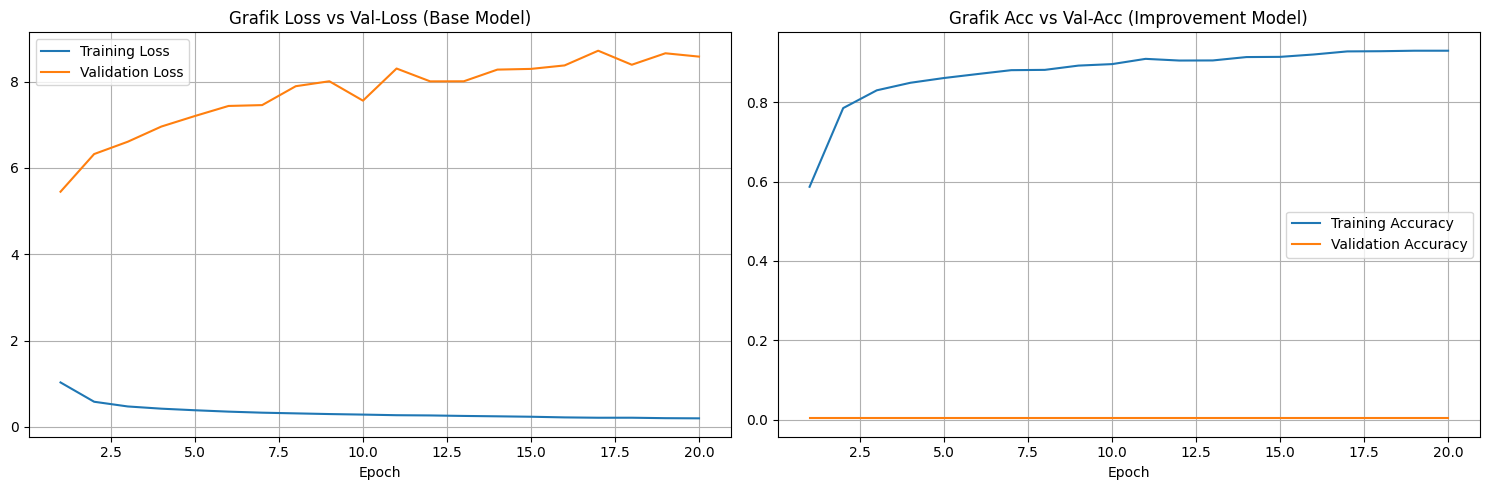

In [25]:
# Plot training result


history_sequential_df_mnet2 = pd.DataFrame(history_seq_mnet2.history)

# Buat array epoch: 1 sampai jumlah epoch
epochs = np.arange(1, len(history_sequential_df_mnet2) + 1)

plt.figure(figsize=(15, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_sequential_df_mnet2['loss'], label='Training Loss')
plt.plot(epochs, history_sequential_df_mnet2['val_loss'], label='Validation Loss')
plt.grid(True)
plt.legend()
plt.title('Grafik Loss vs Val-Loss (Base Model)')
plt.xlabel('Epoch')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history_sequential_df_mnet2['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_sequential_df_mnet2['val_accuracy'], label='Validation Accuracy')
plt.grid(True)
plt.legend()
plt.title('Grafik Acc vs Val-Acc (Improvement Model)')
plt.xlabel('Epoch')

plt.tight_layout()
plt.show()

In [26]:
# predict data test
y_pred_prob_mnet2 = model_aug_mnet2.predict(test_set_aug_mnet2)

# predict probabilitas tertinggi 
y_pred_class_aug_mnet2 = np.argmax(y_pred_prob_mnet2, axis=-1)

# predict data test
print(classification_report(test_set_aug_mnet2.classes, y_pred_class_aug_mnet2, target_names=np.array(list(train_set_aug_mnet2.class_indices.keys()))))

22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 900ms/step
              precision    recall  f1-score   support

    Darkspot       0.00      0.00      0.00        61
   Jerawatan       0.66      0.79      0.72       185
   Kemerahan       0.74      0.89      0.81       108
     Kerutan       0.76      0.89      0.82       100
      Normal       0.86      0.80      0.83       240

    accuracy                           0.76       694
   macro avg       0.60      0.67      0.64       694
weighted avg       0.70      0.76      0.72       694



c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\.conda\envs\h8_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Transisi dari arsitektur CNN sederhana ke teknik Transfer Learning membawa perubahan drastis pada stabilitas dan akurasi model dalam mengenali kondisi kulit wajah.

1. Analisis Grafik Pelatihan dan Stabilitas Berdasarkan grafik yang dilampirkan, terlihat perbedaan fundamental pada dinamika pembelajaran kedua model. Base Model menunjukkan indikasi overfitting yang sangat ekstrem, di mana Validation Loss terus meningkat tajam sementara Training Loss mendekati nol. Hal ini menandakan model gagal melakukan generalisasi dan hanya menghafal dataset latihan. Sebaliknya, Improvement Model menunjukkan grafik akurasi yang jauh lebih stabil dan konsisten sejak epoch awal. Pemanfaatan bobot pre-trained dari MobileNetV2 terbukti mampu mengatasi masalah stabilitas yang sebelumnya dialami oleh model dasar.

2. Peningkatan Akurasi dan Kualitas Klasifikasi Perbedaan performa tercermin secara jelas pada hasil evaluasi data uji:

Lonjakan Akurasi: Akurasi keseluruhan meningkat secara signifikan dari 57% pada Base Model menjadi 76% pada Improvement Model.

F1-Score yang Lebih Solid: Pada model improvement, hampir semua kelas utama mengalami peningkatan kualitas prediksi. Kelas Normal mencapai F1-score tertinggi yaitu 0.83, disusul oleh Kerutan (0.82) dan Kemerahan (0.81). Hal ini membuktikan bahwa model jauh lebih cerdas dalam membedakan tekstur dan rona warna kulit setelah menggunakan basis MobileNetV2.

3. Efisiensi Arsitektur Dilihat dari ringkasan parameter, Improvement Model jauh lebih efisien. Meskipun memiliki total 2,3 juta parameter, model ini hanya melatih 82.309 parameter (sekitar 321 KB) pada bagian head classifier. Dengan membekukan (freezing) jutaan parameter dasar, model mampu mempertahankan kemampuan ekstraksi fitur tingkat tinggi tanpa perlu proses training yang berat dari nol seperti pada Base Model.

4. Tantangan yang Belum Terpecahkan (Darkspot) Meskipun terjadi peningkatan performa yang masif, kedua model memiliki kesamaan kelemahan, yaitu kegagalan total dalam mendeteksi kelas Darkspot (skor 0.00). Fenomena ini mengonfirmasi bahwa kendala utama bukan terletak pada arsitektur model, melainkan pada karakteristik fitur visual darkspot yang sangat halus. Fitur pigmentasi kecil ini kemungkinan besar terabaikan atau dianggap sebagai noise oleh filter konvolusi pada kedua model, menunjukkan perlunya strategi data khusus (seperti augmentasi yang lebih agresif atau resolusi input lebih tinggi) di masa mendatang.

# G. Model Saving

In [27]:
# save model transer learing (MobileNetV2)

model_aug_mnet2.save('Skin_Project.keras')

# H. Conclusion

Berdasarkan seluruh proses pengembangan model klasifikasi kondisi kulit wajah yang telah dilakukan, dapat ditarik beberapa kesimpulan utama sebagai berikut:

Kesimpulan EDA :

1. Keseimbangan Data (Class Distribution): Dataset memiliki distribusi kelas yang sangat baik dan seimbang (balanced). Kelima kategori (Darkspot, Jerawatan, Kemerahan, Kerutan, dan Normal) masing-masing memiliki sekitar 1.000 gambar pada set pelatihan. Hal ini menguntungkan proses training karena model tidak akan cenderung memihak (bias) pada salah satu kelas tertentu.

2. Variasi Dimensi Gambar: Ditemukan variasi resolusi gambar yang sangat signifikan antar kelas. Sebagai contoh:
- Kemerahan: Memiliki gambar dengan resolusi tinggi (720x480).
- Normal: Memiliki gambar dengan resolusi yang jauh lebih kecil (149x121). Perbedaan ini menegaskan bahwa tahap standardisasi (resizing) ke 224x224 merupakan langkah wajib agar model CNN dapat menerima input dengan ukuran yang seragam.

3. Karakteristik Visual dan Fitur:
- Fitur Tekstur: Masalah kulit seperti Kerutan dan Jerawatan memiliki pola tekstur dan bentuk yang cukup menonjol (garis atau benjolan), sehingga lebih mudah ditangkap oleh filter konvolusi.
- Fitur Warna: Kelas Kemerahan sangat bergantung pada informasi rona warna (hue), sedangkan Darkspot bergantung pada kontras warna gelap terhadap kulit dasar.
- Tantangan Darkspot: Secara visual, Darkspot seringkali memiliki ukuran yang kecil dan samar. EDA menunjukkan bahwa tanpa perbesaran atau resolusi tinggi, fitur ini bisa menyerupai tekstur kulit biasa atau bayangan, yang menjelaskan mengapa model mengalami kesulitan (skor 0) pada kelas ini.

Kesimpulan Modeling :

Secara keseluruhan, penggunaan Improvement Model (Transfer Learning MobileNetV2) terbukti jauh lebih efektif dibandingkan Base Model (CNN Sequential). Keunggulan utama terletak pada stabilitas pelatihan; jika Base Model mengalami overfitting yang parahdi mana model hanya menghafal data latihan tanpa kemampuan generalisasicImprovement Model justru menunjukkan kurva belajar yang sehat dan stabil. Hal ini berdampak langsung pada lonjakan akurasi keseluruhan dari 57% menjadi 76%, dengan peningkatan kualitas prediksi yang signifikan pada kelas Normal, Kemerahan, dan Kerutan.

Meskipun akurasi meningkat drastis, kedua model masih memiliki kelemahan yang sama pada deteksi kelas Darkspot (skor 0.00). Fenomena ini mengindikasikan bahwa fitur pigmentasi kecil tersebut kemungkinan hilang dalam proses downsampling atau memerlukan penanganan data khusus di luar kapasitas arsitektur standar. Sebagai kesimpulan, strategi Transfer Learning berhasil memperbaiki masalah fundamental stabilitas dan efisiensi model, memberikan performa yang jauh lebih kredibel untuk mendeteksi mayoritas kondisi kulit wajah.

1. Performa Model Keseluruhan: Model pengembangan menggunakan arsitektur MobileNetV2 (Transfer Learning) berhasil mencapai akurasi sebesar 76% pada data pengujian. Performa ini menunjukkan bahwa teknik transfer learning jauh lebih efektif dan stabil dibandingkan membangun model CNN dari awal (Base Model) untuk dataset citra medis/wajah yang memiliki kompleksitas tekstur tinggi.

2. Karakteristik Prediksi Tiap Kelas:
- Model sangat baik dalam mengenali kelas Normal (Precision 0.86), Kerutan, dan Kemerahan. Hal ini dikarenakan fitur visual pada kelas tersebut (seperti garis lipatan atau perubahan rona warna yang luas) cukup kontras dan konsisten.
- Terdapat kendala signifikan pada kelas Darkspot yang mendapatkan skor 0.00 pada Precision dan Recall. Hal ini mengindikasikan bahwa model gagal total dalam membedakan bercak hitam kecil dengan fitur kulit lainnya atau bayangan pada gambar.

3. Pengaruh Preprocessing dan Augmentasi: Penggunaan ImageDataGenerator dengan teknik rotasi dan horizontal flip sangat membantu model untuk tetap tangguh menghadapi variasi pengambilan gambar wajah. Selain itu, proses resizing ke 224x224 dan normalisasi piksel menjadi kunci agar arsitektur pre-trained model dapat memproses data dengan optimal.

4. Analisis Kegagalan (Darkspot Issue): Kegagalan deteksi pada kelas Darkspot kemungkinan besar disebabkan oleh fitur visualnya yang terlalu halus (subtle) atau ukurannya yang terlalu kecil untuk ditangkap oleh filter konvolusi pada resolusi yang digunakan. Selain itu, potensi adanya label noise (kemiripan visual antara Darkspot dan Jerawat tahap awal) dapat membingungkan model.

5. Rekomendasi Pengembangan: Untuk meningkatkan akurasi di masa depan, disarankan untuk:

- Melakukan Oversampling khusus atau menambah data berkualitas tinggi untuk kelas yang sulit dideteksi (Darkspot).
- Mencoba teknik Fine-tuning pada lebih banyak lapisan di base model MobileNetV2.
- Menggunakan resolusi input yang lebih tinggi (jika sumber daya komputasi mencukupi) untuk menangkap detail titik-titik pigmen yang kecil.